In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
import statsmodels.api as sm
from time import time
warnings.filterwarnings('ignore')
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [148]:
ccdefault=pd.read_csv('../data//UCI_Credit_Card.csv')
ccdefault.rename(columns={'default.payment.next.month':'DEFAULT'},inplace=True)
ccdefault.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [149]:
ccdefault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
DEFAULT      30000 non-null int64
dtypes: float64

In [150]:
cc = ccdefault.copy() # taking a copy in memory
if 'DEFAULT' in cc:
    y = cc['DEFAULT'].values
    del cc['DEFAULT']
    del cc['ID']
    del cc['BILL_AMT1']
    del cc['BILL_AMT2']
    del cc['BILL_AMT3']
    del cc['BILL_AMT4']
    del cc['BILL_AMT5']
    del cc['BILL_AMT6']
    X = cc.values
num_cv_iterations = 5
num_instances = len(y)
cv_object = StratifiedShuffleSplit(n_splits = num_cv_iterations,
test_size = 0.20, train_size = 0.80, random_state=11)
cv_object.get_n_splits(X, y)
print(cv_object)
for train_index, test_index in cv_object.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=11, test_size=0.2,
            train_size=0.8)
TRAIN: [28976 29616 20315 ...  6063 16283 15621] TEST: [ 6669  6830 16516 ... 16163  1990  7999]
TRAIN: [11237  9898 17028 ...  1265   611  7250] TEST: [ 4174 19421 15502 ... 19995  6124 25090]
TRAIN: [23721 14143  5492 ...  4346  5119 23351] TEST: [21778  4074 19546 ...   941 14061 13584]
TRAIN: [19706  2009 13912 ...  3924 20112 21366] TEST: [ 7136 15572 21097 ... 24126  8440  7078]
TRAIN: [ 5794  1831 15948 ... 18673 15962 17274] TEST: [17565 28798 29978 ... 10151 11434 21212]


In [151]:


from sklearn.model_selection import ShuffleSplit

mcc = ccdefault.copy()
# Y Response variable dataframe
y_reg = mcc['PAY_AMT1'].values
# Features with no predictive features with respect to resposne variable
mcredit = mcc.drop(['PAY_AMT1'],axis=1)
# Create inci_X Explanatory Variables DF to support the individual models
mcc_X = mcredit
del mcc_X['DEFAULT']
del mcc_X['ID']
del mcc_X['BILL_AMT1']
del mcc_X['BILL_AMT2']
del mcc_X['BILL_AMT3']
del mcc_X['BILL_AMT4']
del mcc_X['BILL_AMT5']
del mcc_X['BILL_AMT6']

X_reg = mcc_X.values
num_cv_iterations = 5
num_instances = len(y_reg)
cv_object_reg = ShuffleSplit(n_splits = num_cv_iterations,
test_size = 0.20, train_size = 0.80, random_state=11)
cv_object_reg.get_n_splits(X_reg, y_reg)
print(cv_object_reg)
for train_index, test_index in cv_object_reg.split(X_reg, y_reg):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
    y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]

ShuffleSplit(n_splits=5, random_state=11, test_size=0.2, train_size=0.8)
TRAIN: [10574  1826 26458 ... 21584  3775 10137] TEST: [16131 22502  9281 ...  2302 20117  5325]
TRAIN: [14312  5621  9756 ... 14795  1761 10411] TEST: [23990 12026 18018 ... 18504  3826 22997]
TRAIN: [24613 18862  7514 ...  9825 21800  7223] TEST: [25751  1408  2329 ... 13731  9430 17834]
TRAIN: [ 5199 22129  7059 ... 26445 16174 28119] TEST: [ 1736 20903   973 ... 24406 27021 16104]
TRAIN: [11485 26551  2766 ...  9370 20203 25639] TEST: [18873  8061  1602 ... 17926 20760   999]


In [152]:
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

## Modeling and Evaluation 3 
We planned to use 3 models for our classification. Random forest , Decision tree and KNN. 

### Classification Models 

#### Random Forest model 

Random forest is an ensempble technique that uses set of decision trees to handle classification problem. It uses random vectors to choose features absed on which it creates decision trees. Classification is done with each of these decision trees and then a majority vote is taken to decide final class. 
Following images gives an overview  of decision tree algo. 

In [153]:
Image(url ='../images/random_forest_tan.png')

The time it takes to fit and predict for iteration 0  is 0.8315548896789551 recall is 0.599118039448347 
classification report for iteration 0 with improved recall 0.599118039448347 


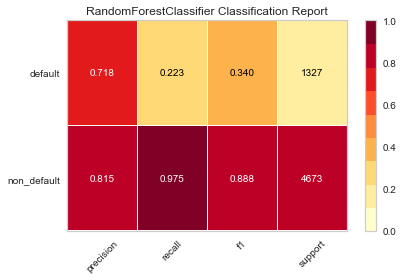

The time it takes to fit and predict for iteration 1  is 0.7693910598754883 recall is 0.5883447391587678 
The time it takes to fit and predict for iteration 2  is 0.8119082450866699 recall is 0.588772729742975 
The time it takes to fit and predict for iteration 3  is 0.8394620418548584 recall is 0.5957223357062029 
The time it takes to fit and predict for iteration 4  is 0.7733480930328369 recall is 0.6042440894484195 
classification report for iteration 4 with improved recall 0.6042440894484195 


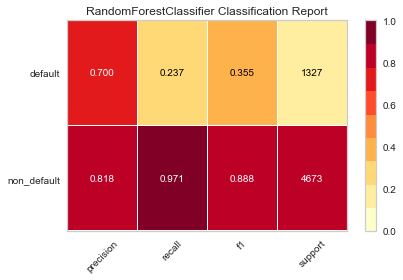

The time it takes to fit and predict for iteration 5  is 7.168600082397461 recall is 0.7132571937976521 
classification report for iteration 5 with improved recall 0.7132571937976521 


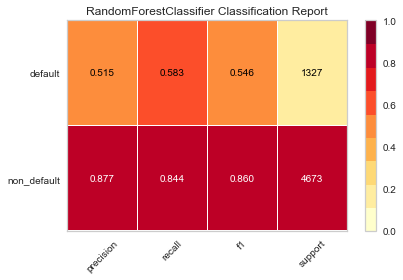

The time it takes to fit and predict for iteration 6  is 6.641535043716431 recall is 0.7022646571858313 
The time it takes to fit and predict for iteration 7  is 7.176965713500977 recall is 0.7017624858673606 
The time it takes to fit and predict for iteration 8  is 8.094079971313477 recall is 0.7017532939068106 
The time it takes to fit and predict for iteration 9  is 9.220934867858887 recall is 0.7088098975160904 
The time it takes to fit and predict for iteration 10  is 52.42469811439514 recall is 0.6592547480910959 
The time it takes to fit and predict for iteration 11  is 91.5639419555664 recall is 0.658728951821387 
The time it takes to fit and predict for iteration 12  is 46.044820070266724 recall is 0.6502163900397205 
The time it takes to fit and predict for iteration 13  is 34.29901075363159 recall is 0.6613152792477299 
The time it takes to fit and predict for iteration 14  is 33.97368812561035 recall is 0.6639016066740729 
The time it takes to fit and predict for iteration 

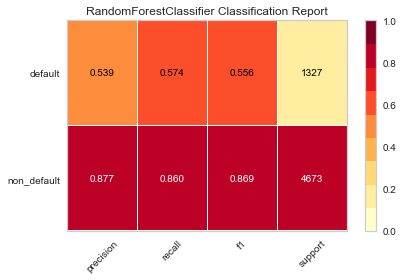

The time it takes to fit and predict for iteration 26  is 26.98775601387024 recall is 0.6996461578975632 
The time it takes to fit and predict for iteration 27  is 27.529770851135254 recall is 0.7018051397895622 
The time it takes to fit and predict for iteration 28  is 27.688963890075684 recall is 0.7011165490606381 
The time it takes to fit and predict for iteration 29  is 26.43986988067627 recall is 0.7038610749659212 
The time it takes to fit and predict for iteration 30  is 0.8355720043182373 recall is 0.599118039448347 
The time it takes to fit and predict for iteration 31  is 0.7911570072174072 recall is 0.5883447391587678 
The time it takes to fit and predict for iteration 32  is 0.8061349391937256 recall is 0.588772729742975 
The time it takes to fit and predict for iteration 33  is 0.7960939407348633 recall is 0.5957223357062029 
The time it takes to fit and predict for iteration 34  is 0.7983648777008057 recall is 0.6042440894484195 
The time it takes to fit and predict for 

In [154]:
## Random Forest classifiers models with different parameters 

iter_num=0
times_rec=[]
 
rf_max_acc = 0
rf_max_recal = 0
rf_trn_idx_max_acc = []
rf_tst_idx_max_acc  = []
rf_estimator_for_max = 0
rf_max_depth_max = 0
rf_class_weight_max = None

#for loop 
estimators = [100,   500, 1000]
max_depths = [2,5,10]
class_weights = [None , 'balanced']
for estimator , max_depth , class_weight in zip(estimators*len(max_depths)*len(class_weights) ,
             max_depths*len(class_weights)*len(estimators),
             class_weights*len(max_depths)*len(estimators)):
    for train_indices, test_indices in cv_object.split(X,y): 
        X_train = X[train_indices]
        y_train = y[train_indices] 
        X_test = X[test_indices]
        y_test = y[test_indices]

         #we count the time in executing the logistic regression
        t0 = time()
        random_forest = RandomForestClassifier(n_estimators=estimator, max_depth=max_depth, class_weight= class_weight,
                                               random_state=0)

        random_forest.fit(X_train,y_train)  # train object
        y_hat = random_forest.predict(X_test) # get test set precitions

        t1=time()
        diff=np.array([t1-t0])

        times_rec=np.append(times_rec,diff)


        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        acc = mt.accuracy_score(y_test,y_hat)
        rcl = recall_score(y_test, y_hat, average='macro') 
        print ("The time it takes to fit and predict for iteration {}  is {} recall is {} ".format(iter_num, diff[0],
                                                                                                   rcl)) 

        #if acc > rf_max_acc :
        if rcl > rf_max_recal:
            #rf_max_acc = acc
            rf_max_recal = rcl
            rf_trn_idx_max_acc = train_indices
            rf_tst_idx_max_acc  = test_indices
            rf_estimator_for_max = estimator
            rf_max_depth_max = max_depth
            rf_class_weight_max = class_weight
            
            print ("classification report for iteration {} with improved recall {} ".format(iter_num, rcl))
            rf_cl_reporter = ClassificationReport(random_forest, classes=['non_default' , 'default'], support=True)
            rf_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
            rf_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
            rf_cl_reporter.show()   


        iter_num+=1    

#### Random forest with class_weight = balanced 
In above section we explored random forest with default parameters. Default parameters has 100 estimators and max_depth value 2 also used default class weight wich gives equal weight to each of the classes. However in the cases where claases are unbalanced we need to adjust weight of the classes so that they are properly represented. for example in our case we have two classes default and non default and each class will get equal weight. However 

####  Decision Tree classifiers 

We need to create some more  models by adjusting n_estimators and max_depth parameters. Also we need to  create one models with class_weight='balanced'

In [155]:
Image(url ='../images/decision_tree_tan.png')

The time it takes to fit and predict for iteration 0  is 0.257343053817749 
classification report for iteration 0 


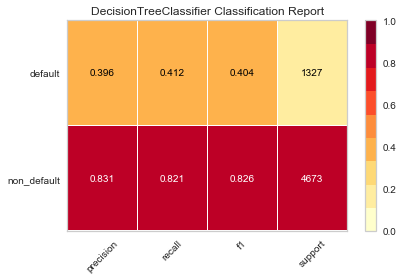

The time it takes to fit and predict for iteration 1  is 0.24636292457580566 
classification report for iteration 1 


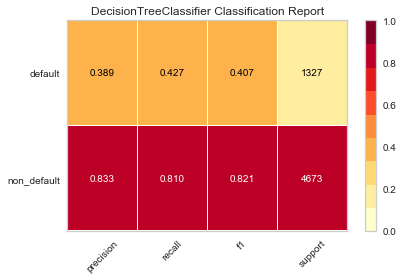

The time it takes to fit and predict for iteration 2  is 0.23583078384399414 
The time it takes to fit and predict for iteration 3  is 0.25571703910827637 
The time it takes to fit and predict for iteration 4  is 0.24703598022460938 
The time it takes to fit and predict for iteration 5  is 0.2094898223876953 
The time it takes to fit and predict for iteration 6  is 0.2199549674987793 
The time it takes to fit and predict for iteration 7  is 0.22917389869689941 
The time it takes to fit and predict for iteration 8  is 0.23163223266601562 
The time it takes to fit and predict for iteration 9  is 0.2255079746246338 


In [156]:
## Decision tree classifiers 

iter_num=0
times_rec=[]
decision_tree_classifiers = dict()
random_forest_classifiers = dict()

class_weights = [None , 'balanced']
dt_max_acc = 0
dt_max_recall = 0
dt_trn_idx_max_acc =[]
dt_tst_idx_max_acc = []
dt_class_weight_for_max = []

for class_weight in class_weights:
    for train_indices, test_indices in cv_object.split(X,y): 
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]

         #we count the time in executing the logistic regression
        t0 = time()
        decision_tree = DecisionTreeClassifier(class_weight = class_weight)
        decision_tree.fit(X_train,y_train)  # train object
        y_hat = decision_tree.predict(X_test) # get test set precitions
        t1=time()
        diff=np.array([t1-t0])

        print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
        times_rec=np.append(times_rec,diff)


        # now let's get the accuracy , recall and confusion matrix for this iterations of training/testing
        acc = mt.accuracy_score(y_test,y_hat)
        rcl = recall_score(y_test, y_hat, average='macro') 

        #if acc> dt_max_acc:
        if rcl> dt_max_recall:
            #dt_max_acc = acc
            dt_max_recall = rcl
            dt_trn_idx_max_acc = train_indices
            dt_tst_idx_max_acc = test_indices
            dt_class_weight_for_max = class_weight
            conf = mt.confusion_matrix(y_test,y_hat)
            print ("classification report for iteration {} ".format(iter_num))

            dt_cl_reporter = ClassificationReport(decision_tree, classes=['non_default' , 'default'], support=True)
            dt_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
            dt_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
            dt_cl_reporter.show()  

       
        iter_num+=1
    

#### Decision tree with balanced class 
class weight impacts decison tree classifier as well and we 

#### KNN 
TBD 

For k =  10 and metric = Euclidean: 
accuracy: 0.8125
[[4458  215]
 [ 910  417]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.66      0.31      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.63      0.66      6000
weighted avg       0.79      0.81      0.79      6000

classification report for iteration 10 


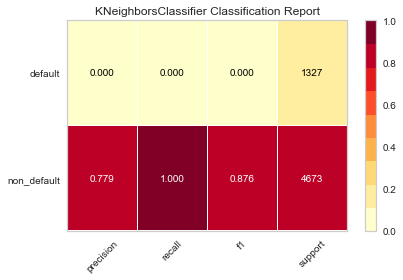

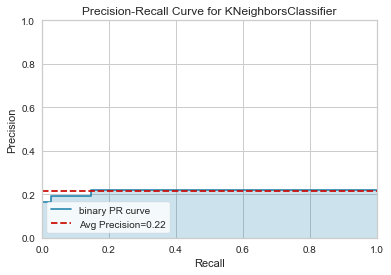

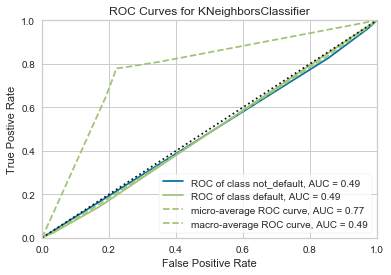

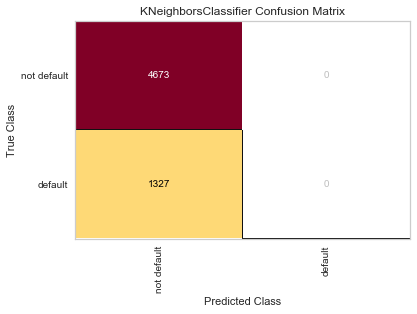

For k =  20 and metric = Euclidean: 
accuracy: 0.8143333333333334
[[4429  244]
 [ 870  457]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.34      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000

classification report for iteration 10 


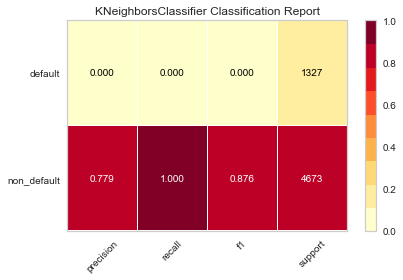

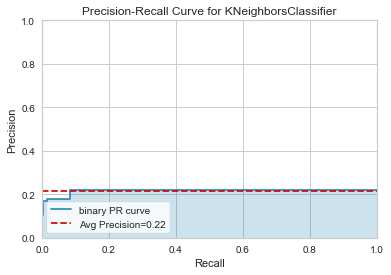

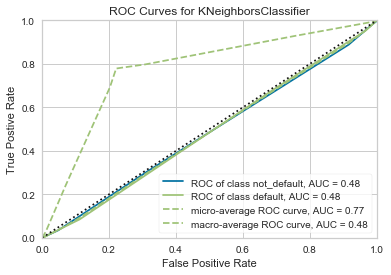

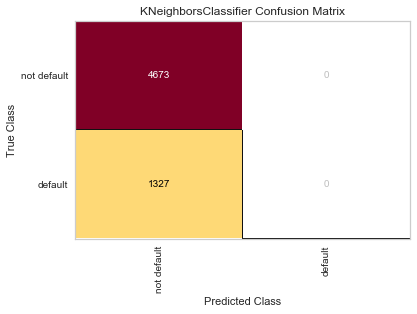

For k =  50 and metric = Euclidean: 
accuracy: 0.8111666666666667
[[4430  243]
 [ 890  437]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.64      0.33      0.44      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000

classification report for iteration 10 


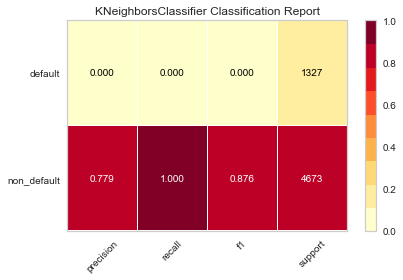

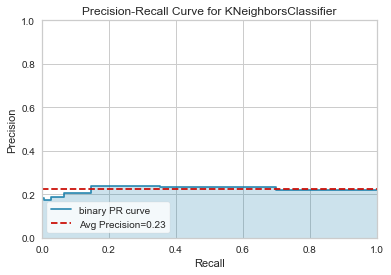

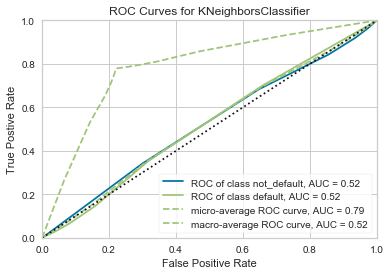

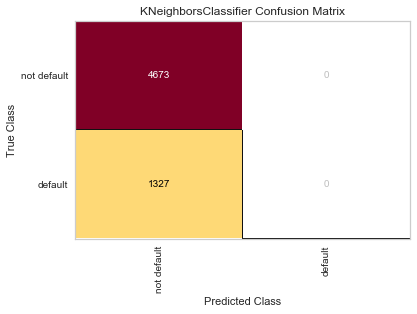

For k =  100 and metric = Euclidean: 
accuracy: 0.8086666666666666
[[4449  224]
 [ 924  403]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.64      0.30      0.41      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000

classification report for iteration 10 


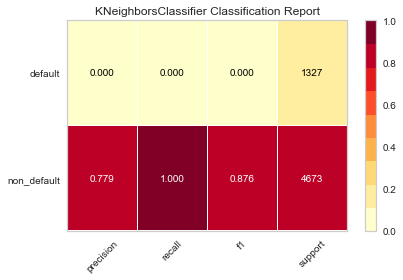

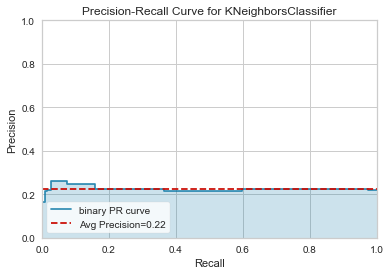

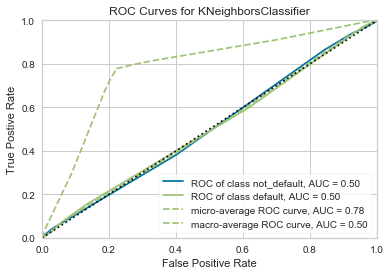

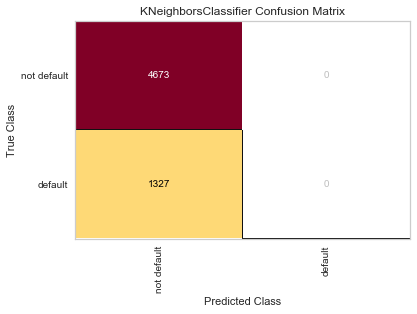

In [157]:
parameters = [10, 20, 50, 100]
metrices = ['euclidean', 'cosine', 'manhattan']
max_acc_knn = 0 
for met in metrices:
    for param in parameters:
        for train_indices, test_indices in cv_object.split(X,y): 
            X_train_scaled = X[train_indices]
            y_train = y[train_indices]
            X_test_scaled = X[test_indices]
            y_test = y[test_indices]   
            print("For k = ", K, "and metric = Euclidean: ")
            knn = KNeighborsClassifier(n_neighbors= param, weights='uniform', metric=mat)
            knn.fit(X_train_scaled,y_train)
            y_hat = knn.predict(X_test_scaled)
            acc = mt.accuracy_score(y_test,y_hat)
            conf = mt.confusion_matrix(y_test,y_hat)
            print('accuracy:', acc )
            print(conf)
            ClassReport = mt.classification_report(y_test,y_hat)
            print(ClassReport)
            
            if acc>max_acc_knn :
                max_acc_knn = acc
                max_mat = mat
                max_k = param
                max 
             
  
    
print("Max accuracy is:", max_acc_knn)    

### Regression Models 

#### Random Forest Regession 

In [158]:
## Random forest regression models with different parameters 

iter_num=0
times_rec=[]
 
rf_reg_max_score = 0
rf_reg_trn_idx_max_acc = []
rf_reg_tst_idx_max_acc  = []
rf_reg_estimator_for_max = 0
rf_reg_max_depth_max = 0

#for loop 
estimators = [100, 500, 1000]
max_depths = [2, 10]
for estimator , max_depth  in zip(estimators*len(max_depths),max_depths* len(estimators)):
    for train_index, test_index in cv_object_reg.split(X_reg,y_reg): 
        X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
        y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]
         
        
         #we count the time in executing the logistic regression
        t0 = time()
        random_forest = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth, 
                                              random_state=0)
        random_forest.fit(X_reg_train,y_reg_train)  # train object
        y_reg_hat = random_forest.predict(X_reg_test) # get test set precitions
        t1=time()
        diff=np.array([t1-t0])
        times_rec=np.append(times_rec,diff)
        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        score = random_forest.score(X_reg_test,y_reg_test)
        print ("The time it takes to fit and predict for iteration {} is {} score is {} ".format(iter_num, diff[0],score)) 
        if score > rf_reg_max_score :
            rf_reg_trn_idx_max_acc = train_index
            rf_reg_tst_idx_max_acc = test_index
            rf_reg_estimator_for_max = estimator
            rf_reg_max_depth_max = max_depth
            
        iter_num+=1
        
    

The time it takes to fit and predict for iteration 0 is 1.5809681415557861 score is 0.16360892980972486 
The time it takes to fit and predict for iteration 1 is 1.5264050960540771 score is 0.09137216065580522 
The time it takes to fit and predict for iteration 2 is 1.5492560863494873 score is -0.044368448598679056 
The time it takes to fit and predict for iteration 3 is 1.5901849269866943 score is -0.23572244690454916 
The time it takes to fit and predict for iteration 4 is 1.4628181457519531 score is 0.026385366168372722 
The time it takes to fit and predict for iteration 5 is 33.18050479888916 score is 0.25540045508964815 
The time it takes to fit and predict for iteration 6 is 32.924073934555054 score is 0.23194902305575082 
The time it takes to fit and predict for iteration 7 is 33.86341309547424 score is 0.07493438381740214 
The time it takes to fit and predict for iteration 8 is 34.88904404640198 score is -0.14625755356806347 
The time it takes to fit and predict for iteration 9 

####  Decision Tree Regession 

In [159]:
iter_num=0
times_rec=[]
 
dt_reg_max_acc = 0
dt_reg_trn_idx_max_acc = []
dt_reg_tst_idx_max_acc  = []
dt_reg_max_depth_max = 0

#for loop 
estimators = [100,  1000]
max_depths = [2,10]
for   max_depth  in max_depths:
    for test_index, test_index in cv_object_reg.split(X_reg,y_reg): 
        X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
        y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]
         
         #we count the time in executing the logistic regression
        t0 = time()
        decision_tree = DecisionTreeRegressor(max_depth=max_depth, 
                                              random_state=0)
        decision_tree.fit(X_reg_train,y_reg_train)  # train object
        y_reg_hat = decision_tree.predict(X_reg_test) # get test set precitions
        t1=time()
        diff=np.array([t1-t0])
        times_rec=np.append(times_rec,diff)
        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        score = decision_tree.score(X_reg_test,y_reg_test)
        
        print ("The time it takes to fit and predict for iteration {} is {} score is {} ".format(iter_num, diff[0],score)) 
        
        if dt_reg_max_acc> score:
            dt_reg_trn_idx_max_acc = train_index
            dt_reg_tst_idx_max_acc = test_index
            dt_reg_max_depth_max = max_depth
        iter_num+=1

The time it takes to fit and predict for iteration 0 is 0.028586149215698242 score is 0.3096141380079973 
The time it takes to fit and predict for iteration 1 is 0.0279691219329834 score is 0.08268366269192973 
The time it takes to fit and predict for iteration 2 is 0.027533769607543945 score is 0.0721189294715161 
The time it takes to fit and predict for iteration 3 is 0.0268557071685791 score is 0.07014883678137007 
The time it takes to fit and predict for iteration 4 is 0.026707887649536133 score is -0.4461196476543723 
The time it takes to fit and predict for iteration 5 is 0.11028599739074707 score is 0.6168875160335299 
The time it takes to fit and predict for iteration 6 is 0.10784006118774414 score is 0.23556266502573686 
The time it takes to fit and predict for iteration 7 is 0.10473799705505371 score is 0.2878067166408218 
The time it takes to fit and predict for iteration 8 is 0.10885214805603027 score is 0.023151277835449235 
The time it takes to fit and predict for iterati

#### KNN Regession 

## Modeling and Evaluation 4
Analysis of the performance of the model 

## Classification Tasks 

#### Random Forest 
Random Forest gives 
Analysis of Random forst with the best estimate 

running model for max accuracy 0
parameters for the model with best accuracy is num_estimators 1000 , max_depth 10 and class_weight
The time it takes to fit and predict for iteration 10  is 22.982319831848145 
classification report for iteration 10 


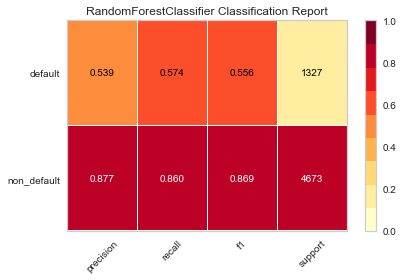

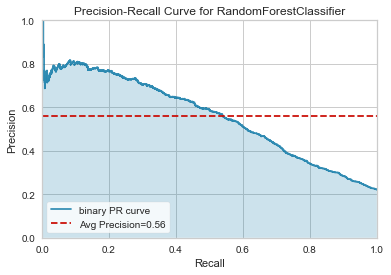

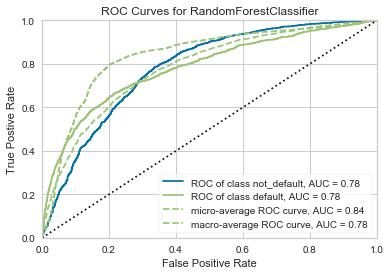

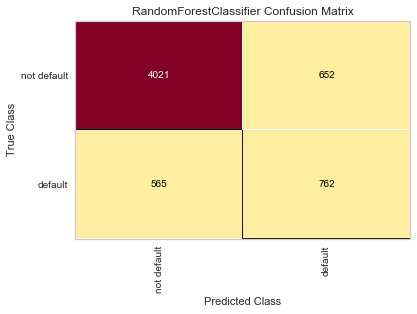

In [160]:
t0 = time()


X_train, X_test = X[rf_trn_idx_max_acc], X[rf_tst_idx_max_acc]
y_train, y_test = y[rf_trn_idx_max_acc], y[rf_tst_idx_max_acc]

print ('running model for max accuracy {}'.format(rf_max_acc))
print('parameters for the model with best accuracy is num_estimators {} , max_depth {} and class_weight'.format(
    rf_estimator_for_max, rf_max_depth_max,  rf_class_weight_max))

random_forest = RandomForestClassifier(n_estimators=rf_estimator_for_max, max_depth=rf_max_depth_max,
                         random_state=0, class_weight = rf_class_weight_max)


random_forest.fit(X_train,y_train)  # train object
y_hat = random_forest.predict(X_test) # get test set precitions

t1=time()
diff=np.array([t1-t0])

print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
times_rec=np.append(times_rec,diff)


# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print ("classification report for iteration {} ".format(iter_num))

rf_cl_reporter = ClassificationReport(random_forest, classes=['non_default' , 'default'], support=True)

rf_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
rf_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
rf_cl_reporter.show()   

pr_curve = PrecisionRecallCurve(random_forest)
pr_curve.fit(X_train, y_train)
pr_curve.score(X_test, y_test)
pr_curve.show()


roc_curve = ROCAUC(random_forest, classes=["not_default", "default"])
roc_curve.fit(X_train, y_train)        # Fit the training data to the visualizer
roc_curve.score(X_test, y_test)        # Evaluate the model on the test data
roc_curve.show() 


cm = ConfusionMatrix(random_forest, classes=['not default' , 'default'])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
# How did we do?
cm.show()

#### Decision Tree 

Running model for max decision tree accuracy model 0
Parameters for decision tree for max accuracy class_weight None
The time it takes to fit and predict for iteration 10  is 0.27355122566223145 
accurancy for balanced class is 0.7258333333333333
classification report for iteration 10 


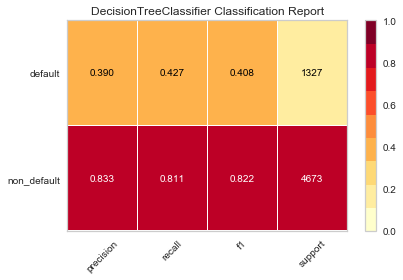

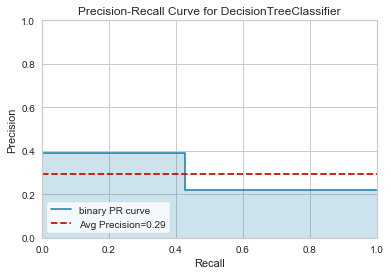

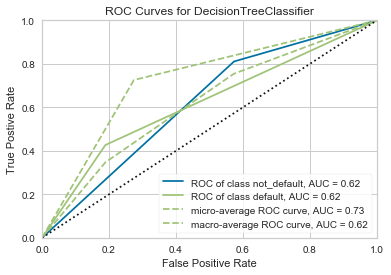

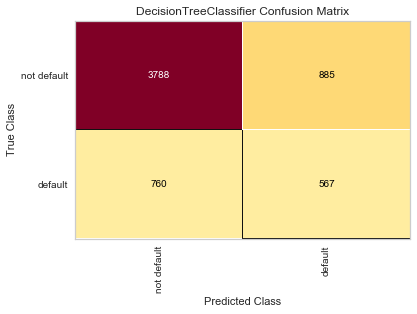

In [161]:
t0 = time()

print('Running model for max decision tree accuracy model {}'.format(dt_max_acc  ))
 
print('Parameters for decision tree for max accuracy class_weight {}'.format(dt_class_weight_for_max  ))


X_train, X_test = X[dt_trn_idx_max_acc], X[dt_tst_idx_max_acc]
y_train, y_test = y[dt_trn_idx_max_acc], y[dt_tst_idx_max_acc]
     
decision_tree = DecisionTreeClassifier(class_weight = dt_class_weight_for_max)

decision_tree.fit(X_train,y_train)  # train object
y_hat = decision_tree.predict(X_test) # get test set precitions

t1=time()
diff=np.array([t1-t0])
print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
times_rec=np.append(times_rec,diff)
# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
print("accurancy for balanced class is {}".format(acc))
conf = mt.confusion_matrix(y_test,y_hat)
print ("classification report for iteration {} ".format(iter_num))
dt_cl_reporter = ClassificationReport(decision_tree, classes=['non_default' , 'default'], support=True)

dt_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
dt_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
dt_cl_reporter.show()  

pr_curve = PrecisionRecallCurve(decision_tree)
pr_curve.fit(X_train, y_train)
pr_curve.score(X_test, y_test)
pr_curve.show()

roc_curve = ROCAUC(decision_tree, classes=["not_default", "default"])

roc_curve.fit(X_train, y_train)        # Fit the training data to the visualizer
roc_curve.score(X_test, y_test)        # Evaluate the model on the test data
roc_curve.show() 

cm = ConfusionMatrix(decision_tree, classes=['not default' , 'default'])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
# How did we do?
cm.show()

iter_num+=1

As we can see from above 

####  KNN 

### Regression Tasks 

<TODO > evaluation tasks for regression 

## Modeling and Evaluation 5

Following is a Comparison of Decision Tree and Random forest classifiers with same date. We are using error estimates to compare two models. The error estimates should follow Gaussian distribution. We calculate mean and standard error using the formula discussed in the class. 
<TODO add image and formula >
    We are caclulating confidence interval for error differences to figure out if the differences are significant
  We can add similar test for knn , decision tree and knn and random forest comparison 


### Decision Tree and Random Forest Comparision based on error rate 

Our model comparison is based on following formula. 
We compare d bar by taking averedge  of the differences of the error rates of the models in different folds using same training set data.

In [162]:
Image(url ='../images/model_comparison.png')

In [163]:
iter_num=0
times_rec=[]
error_rec= [] 
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train,y_train) # train object
    
    random_forest = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
    random_forest.fit(X_train,y_train) 
    
    y_hat_dt = decision_tree.predict(X_test) 
    y_hat_rf = random_forest.predict(X_test) 

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc_dt = mt.accuracy_score(y_test,y_hat_dt)
    acc_rf = mt.accuracy_score(y_test,y_hat_rf)
    error_rec.append(acc_dt - acc_rf)

    iter_num+=1

print(error_rec)

d_bar = sum(error_rec)/len(error_rec)
siqma_squared = sum((error_rec - d_bar))/(5-1)
print(d_bar)
print(siqma_squared)

from scipy import stats
import math

confidence_interval = ( d_bar + (1/math.sqrt(4))*stats.t.isf(.975, 4),  d_bar - (1/math.sqrt(4))*stats.t.isf(.975, 4))
print(confidence_interval)

[-0.07983333333333331, -0.07883333333333331, -0.09133333333333338, -0.08683333333333332, -0.08883333333333332]
-0.08513333333333332
-3.469446951953614e-18
(-1.4733558859322327, 1.303089219265566)


As we can see above tht zero is a possible value for 95% confidence interval it means that we can't reject the null hypothesis that both the models have no difference in their error rate with 95% confidence.

###  KNN  and Random Forest Comparision based on error rate 

In [164]:
iter_num=0
times_rec=[]
error_rec= [] 
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
    knn.fit(X_train,y_train) # train object
    
    random_forest = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
    random_forest.fit(X_train,y_train) 
    
    y_hat_knn = knn.predict(X_test) 
    y_hat_rf = random_forest.predict(X_test) 

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc_knn = mt.accuracy_score(y_test,y_hat_knn)
    acc_rf = mt.accuracy_score(y_test,y_hat_rf)
    error_rec.append(acc_knn - acc_rf)

    iter_num+=1

print(error_rec)

d_bar = sum(error_rec)/len(error_rec)
siqma_squared = sum((error_rec - d_bar))/(5-1)
print(d_bar)
print(siqma_squared)

from scipy import stats
import math

confidence_interval = ( d_bar + (1/math.sqrt(4))*stats.t.isf(.975, 4),  d_bar - (1/math.sqrt(4))*stats.t.isf(.975, 4))
print(confidence_interval)

[-0.048833333333333284, -0.050000000000000044, -0.04283333333333339, -0.05449999999999999, -0.05049999999999999]
-0.04933333333333334
0.0
(-1.4375558859322326, 1.3388892192655661)


## Modeling and Evaluation 6

We 'll be checking feature importance for our best performing model in this section. 

### Random Forest 

Feature importance for best performing  random forest model

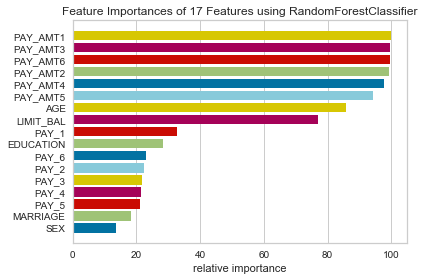

In [165]:
iter_num=0
times_rec=[]

X_train, X_test = X[rf_trn_idx_max_acc], X[rf_tst_idx_max_acc]
y_train, y_test = y[rf_trn_idx_max_acc], y[rf_tst_idx_max_acc]
 #we count the time in executing the logistic regression
t0 = time()
random_forest = RandomForestClassifier(n_estimators=rf_estimator_for_max, max_depth=rf_max_depth_max,
                         random_state=0, class_weight = rf_class_weight_max)
viz = FeatureImportances(random_forest, labels = cc.columns)
viz.fit(X_train_scaled,y_train)
viz.show()

### Decision Tree 

Feature importance for best performing  random forest model

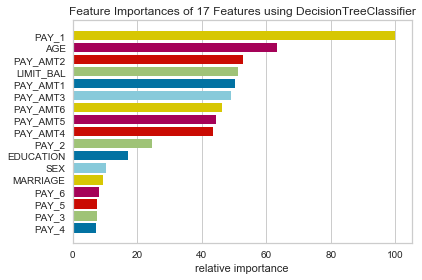

In [166]:
iter_num=0
times_rec=[]
X_train, X_test = X[dt_trn_idx_max_acc], X[dt_tst_idx_max_acc]
y_train, y_test = y[dt_trn_idx_max_acc], y[dt_tst_idx_max_acc]
     
decision_tree = DecisionTreeClassifier(class_weight = dt_class_weight_for_max)
    
 #we count the time in executing the logistic regression
t0 = time()
random_forest = DecisionTreeClassifier()
viz = FeatureImportances(decision_tree, labels = cc.columns)
viz.fit(X_train,y_train)
viz.show()

### KNN 

In case of knn there is no output for feature importance. We run into following error when we attempt to draw graph in same way in which we did for decision tree and random forest. 
In case of KNN we use particular metric to determine proximity of nodes and cluster them accordingly. The distnace is measured based on the difference between corresponding features.

In [167]:
iter_num=0
times_rec=[]
 

for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices] 
    X_test = X[test_indices]
    y_test = y[test_indices]
    
     #we count the time in executing the logistic regression
    t0 = time()
    knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
    #viz = FeatureImportances(knn, labels = cc.columns)
    #viz.fit(X_train_scaled,y_train)
    #viz.show()